In [8]:
import numpy as np
from simplemc.DriverMC import DriverMC
import corner
from getdist import plots, MCSamples
import matplotlib.pyplot as plt
import getdist;

# With MCMC

In [2]:
analysis1 = DriverMC(analyzername='mcmc', model='waCDM', datasets='SN+HD+BBAO+Planck');

Loading  simplemc/data/jla_binned_distances_31nodes_v1.txt
Loading  simplemc/data/cov_jla_binned_distances_31nodes_v1.txt
Eigenvalues of cov matrix: [0.0005070806003107887, 0.0005683516014088356, 0.000739250907386215] ... 0.03645982276128593
Adding marginalising constant
Loading  simplemc/data/HDiagramCompilacion-data_31.txt
Loading  simplemc/data/HDiagramCompilacion-cov_31.txt
Eigenvalues of cov matrix: [16.0, 25.0, 64.0] ... 3844.0
Adding marginalising constant
DR11LOWZ measurement in  Cuesta : 8.468173048634462 +- 0.16748759985432085

Loading  simplemc/data/sdss_DR11CMASS_consensus.dat
Aperp min,max,step,N: 0.961142836 1.12057144 0.0005714290000000677 280
Aparl min,max,step,N: 0.85171431 1.09085718 0.0008571430000000602 280
Loading done
rd =  149.26478152260088  Mpc
Fiducials at z= 0.57 : 14.3015431061137 21.466392296218515

Loading  simplemc/data/chi2_surface_dr11_baseline_fit.txt
Aperp min,max,step,N: 0.5 1.5 0.016666999999999987 61
Aparl min,max,step,N: 0.8 1.2 0.0066669999999999

/home/isidro/Documents/github/simplemc_tests/simplemc/likelihoods/TabulatedBAODVLikelihood.py:37: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  rms /= quad(lambda x: sp.exp(-self.chi2i(alphamin+x)/2), -0.1, 0.1)[0]


In [3]:
res1 = analysis1.executer(GRstop=0.001, nsamp=5000);

INFO:simplemc:
	nsamp: 5000
	skip: 300
	temp: 2
	evidence: False


Bounds: [ 0.1   0.02  0.4  -2.   -2.  ] [0.5   0.025 0.9   0.    2.   ]
Starting chain...
Accepted: 299 | loglike: -34.7340 | Gelman-Rubin: None
Re-initializing covariance matrix after burn-in
[[ 1.01389459e-04 -1.04541204e-06 -9.58663694e-05  2.20063374e-04
  -7.02761026e-05]
 [-1.04541204e-06  1.03599804e-07  8.52818875e-07  2.66040668e-06
   4.20205559e-07]
 [-9.58663694e-05  8.52818875e-07  1.06087852e-04 -3.30439652e-04
   7.87129758e-05]
 [ 2.20063374e-04  2.66040668e-06 -3.30439652e-04  1.78842867e-03
  -6.02235077e-04]
 [-7.02761026e-05  4.20205559e-07  7.87129758e-05 -6.02235077e-04
   1.21226772e-03]]

Accepted: 5000 | loglike: -31.9716 | Gelman-Rubin: [9.93896979e-02 1.26986401e-01 4.49636328e-04 3.89980324e-01
Accepted: 5000 | loglike: -31.9716 | Gelman-Rubin: [9.93896979e-02 1.26986401e-01 4.49636328e-04 3.89980324e-01
Accepted: 5000 | loglike: -31.9716 | Gelman-Rubin: [9.93896979e-02 1.26986401e-01 4.49636328e-04 3.89980324e-01
Number of steps achieved
Accepted: 5001 | lo

INFO:simplemc:
Elapsed time: 14.445 minutes = 866.727 seconds


Om: 0.3081 +/- 0.0102
Obh2: 0.0224 +/- 0.0003
h: 0.6754 +/- 0.0107
w: -0.9237 +/- 0.0943
wa: -0.2146 +/- 0.3944


In [4]:
pars_labels = ['${}$'.format(p.Ltxname) for p in analysis1.pars_info]
pars_labels

['$\\Omega_m$', '$\\Omega_{b}h^2$', '$h$', '$w_0$', '$w_a$']

In [5]:
samples1 = res1['result']['samples']
weights1 = res1['result']['weights']

In [6]:
om1 = res1['result']['samples'][:,0]
obh21 = res1['result']['samples'][:,1]
h1 = res1['result']['samples'][:,2]

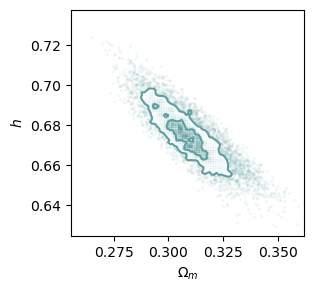

In [9]:
plt.figure(figsize=(3,3), dpi=100)
fig1 = corner.hist2d(om1, h1, bins=100, weights=weights1, smooth=0.8, quantiles=(0.16, 0.84), 
              levels=(1-np.exp(-0.5),1-np.exp(-2)), color='cadetblue')
plt.xlabel('$\Omega_m$')
plt.ylabel('$h$')
plt.show()

<Figure size 3000x3000 with 0 Axes>

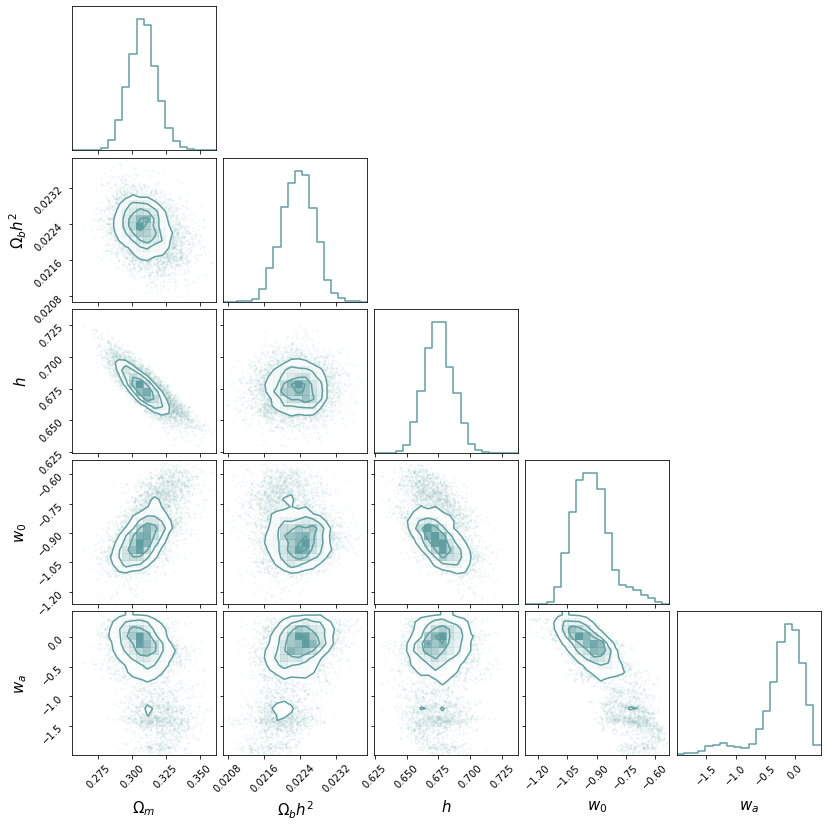

In [10]:
plt.figure(figsize=(10,10), dpi=300)

figcorner1 = corner.corner(samples1, weights=weights1, smooth=0.5, smooth1d=0.5, 
                           labels=pars_labels, label_kwargs ={'fontsize':15},
                           color='cadetblue', 
                           plot_density=True, plot_datapoints=True, divergences=True)

plt.show()

## The same with nested

In [11]:
analysis2 = DriverMC(analyzername='nested', model='waCDM', datasets='HD+SN+BBAO+Planck');

Loading  simplemc/data/HDiagramCompilacion-data_31.txt
Loading  simplemc/data/HDiagramCompilacion-cov_31.txt
Eigenvalues of cov matrix: [16.0, 25.0, 64.0] ... 3844.0
Adding marginalising constant
Loading  simplemc/data/jla_binned_distances_31nodes_v1.txt
Loading  simplemc/data/cov_jla_binned_distances_31nodes_v1.txt
Eigenvalues of cov matrix: [0.0005070806003107887, 0.0005683516014088356, 0.000739250907386215] ... 0.03645982276128593
Adding marginalising constant
DR11LOWZ measurement in  Cuesta : 8.468173048634462 +- 0.16748759985432085

Loading  simplemc/data/sdss_DR11CMASS_consensus.dat
Aperp min,max,step,N: 0.961142836 1.12057144 0.0005714290000000677 280
Aparl min,max,step,N: 0.85171431 1.09085718 0.0008571430000000602 280
Loading done
rd =  149.26478152260088  Mpc
Fiducials at z= 0.57 : 14.3015431061137 21.466392296218515

Loading  simplemc/data/chi2_surface_dr11_baseline_fit.txt
Aperp min,max,step,N: 0.5 1.5 0.016666999999999987 61
Aparl min,max,step,N: 0.8 1.2 0.0066669999999999

/home/isidro/Documents/github/simplemc_tests/simplemc/likelihoods/TabulatedBAODVLikelihood.py:37: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  rms /= quad(lambda x: sp.exp(-self.chi2i(alphamin+x)/2), -0.1, 0.1)[0]


In [12]:
res2 = analysis2.executer(nlivepoints=200, accuracy=0.01)

INFO:simplemc:Using 1 processor
INFO:simplemc:
	nlivepoints: 200
	accuracy: 0.01
	nested type: multi


it: 2789 | ncall: 16167 | eff: 17.257 | logz: -44.9363 | dlogz: 0.8298 | loglstar: -32.1016 | point  3.05785594e-01  2.24302464e-02  6.80607058e-01 -1.01140373e+0096245
it: 3193 | ncall: 18475 | eff: 17.288 | logz: -44.5798 | dlogz: 0.1220 | loglstar: -31.2525 | point  3.15551589e-01  2.23130354e-02  6.66580659e-01 -9.46490383e-01
it: 3649 | ncall: 21062 | eff: 17.330 | logz: -44.5056 | dlogz: 0.0129 | loglstar: -30.8948 | point  3.00386746e-01  2.23318072e-02  6.81547520e-01 -9.85259756e-01
it: 3699 | ncall: 21394 | eff: 17.295 | logz: -44.5034 | dlogz: 0.0100 | loglstar: -30.8742 | point  0.30877896  0.02228292  0.67172265 -0.93290815 -0.0795681 

INFO:simplemc:
Elapsed time: 27.333 minutes = 1639.977 seconds


Om: 0.3072 +/- 0.0103
Obh2: 0.0224 +/- 0.0003
h: 0.6757 +/- 0.0108
w: -0.9370 +/- 0.0985
wa: -0.1543 +/- 0.3775


In [13]:
samples2 = res2['result']['samples']
weights2 = res2['result']['weights']
om2 = res2['result']['samples'][:,0]
obh22 = res2['result']['samples'][:,1]
h2 = res2['result']['samples'][:,2]

In [14]:
# plt.figure(figsize=(6,6), dpi=200)
# fig2 = corner.hist2d(om2, h2, bins=100, weights=weights2, smooth=0.8, quantiles=(0.16, 0.84), 
#               levels=(1-np.exp(-0.5),1-np.exp(-2)), color='olivedrab',plot_datapoints=True,
#              labels=['x', 'y'])
# plt.xlabel('$\Omega_m$')
# plt.ylabel('$h$')

In [15]:
# fig2

In [16]:
plt.figure(figsize=(10,10), dpi=300)

cornerfig2 = corner.corner(samples2, weights=weights2, smooth=0.5, smooth1d=0.5, 
# , smooth=0.5, smooth1d=0.5, 
#                            #                      quantiles=(0.16, 0.84), 
#                       levels=(1-np.exp(-0.5), ), 
                      labels=pars_labels, color='darkred', plot_density=True,
                      plot_datapoints=True, fig=figcorner1)

# cornerfig2.text(0.8, 0.9,'mcmc', fontsize=20, color='cadetblue')
# cornerfig2.text(0.8, 0.85,'nested', fontsize=20, color='darkred')


<Figure size 3000x3000 with 0 Axes>

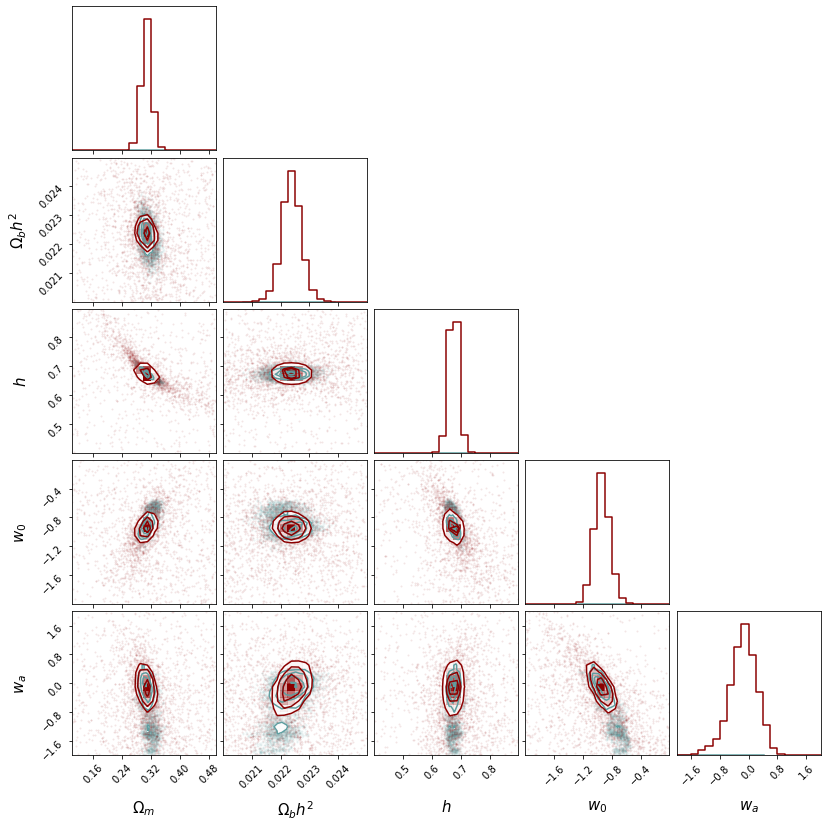

In [17]:
cornerfig2

# With emcee

In [18]:
analysis3 = DriverMC(analyzername='emcee', model='waCDM', datasets='HD+SN+BBAO+Planck')

Loading  simplemc/data/HDiagramCompilacion-data_31.txt
Loading  simplemc/data/HDiagramCompilacion-cov_31.txt
Eigenvalues of cov matrix: [16.0, 25.0, 64.0] ... 3844.0
Adding marginalising constant
Loading  simplemc/data/jla_binned_distances_31nodes_v1.txt
Loading  simplemc/data/cov_jla_binned_distances_31nodes_v1.txt
Eigenvalues of cov matrix: [0.0005070806003107887, 0.0005683516014088356, 0.000739250907386215] ... 0.03645982276128593
Adding marginalising constant
DR11LOWZ measurement in  Cuesta : 8.468173048634462 +- 0.16748759985432085

Loading  simplemc/data/sdss_DR11CMASS_consensus.dat
Aperp min,max,step,N: 0.961142836 1.12057144 0.0005714290000000677 280
Aparl min,max,step,N: 0.85171431 1.09085718 0.0008571430000000602 280
Loading done
rd =  149.26478152260088  Mpc
Fiducials at z= 0.57 : 14.3015431061137 21.466392296218515

Loading  simplemc/data/chi2_surface_dr11_baseline_fit.txt
Aperp min,max,step,N: 0.5 1.5 0.016666999999999987 61
Aparl min,max,step,N: 0.8 1.2 0.0066669999999999

/home/isidro/Documents/github/simplemc_tests/simplemc/likelihoods/TabulatedBAODVLikelihood.py:37: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  rms /= quad(lambda x: sp.exp(-self.chi2i(alphamin+x)/2), -0.1, 0.1)[0]


In [19]:
res3 = analysis3.executer(nsamp=4000, walkers=12)

INFO:simplemc:
	walkers: 12
	nsamp: 4000
	burnin: 0
	nproc: 1
INFO:simplemc:Using 1 processor
100%|██████████| 4000/4000 [1:40:54<00:00,  1.51s/it]
INFO:simplemc:
Elapsed time: 100.919 minutes = 6055.150 seconds


Om: 0.3063 +/- 0.0117
Obh2: 0.0224 +/- 0.0003
h: 0.6768 +/- 0.0122
w: -0.9394 +/- 0.1077
wa: -0.1650 +/- 0.4168


In [20]:
samples3 = res3['result']['samples']
weights3 = res3['result']['weights']
om3 = res3['result']['samples'][:,0]
obh23 = res3['result']['samples'][:,1]
h3 = res3['result']['samples'][:,2]

In [21]:
plt.figure(figsize=(10,10), dpi=300)

cornerfig3 = corner.corner(samples3, weights=weights3, smooth=0.5, smooth1d=0.5, 
                           #                      quantiles=(0.16, 0.84), 
#                      levels=(1-np.exp(-0.5), ),
                           labels=pars_labels, color='indigo', plot_density=True,
                     plot_datapoints=True, fig=cornerfig2)

cornerfig3.text(0.5, 0.95,'mcmc', fontsize=20, color='cadetblue')
cornerfig3.text(0.5, 0.90,'nested', fontsize=20, color='darkred')
cornerfig3.text(0.5, 0.85,'emcee', fontsize=20, color='indigo')




cornerfig3.savefig('samplers2.png')

<Figure size 3000x3000 with 0 Axes>

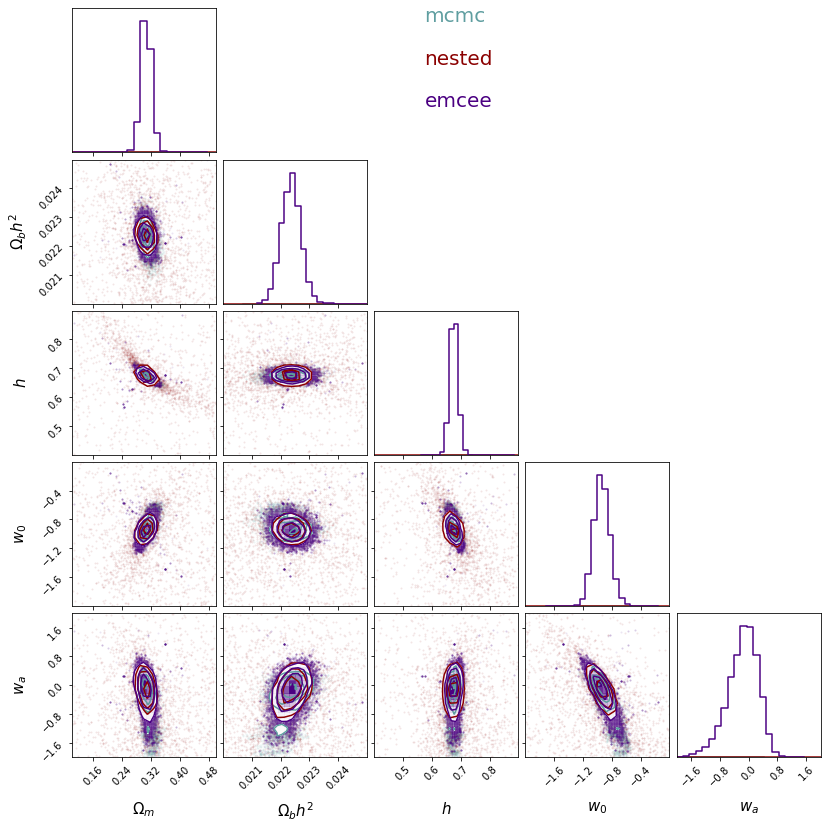

In [22]:
cornerfig3

In [23]:
#Getdist

In [30]:
labels =  ['{}'.format(p.Ltxname) for p in analysis1.pars_info]

samp1 = MCSamples(samples=samples1, names=labels, labels = labels, label='mcmc')
samp2 = MCSamples(samples=samples2, names = labels, labels = labels, label='nested')
samp3 = MCSamples(samples=samples3, names = labels, labels = labels, label='emcee')

Removed no burn in
Removed no burn in
Removed no burn in


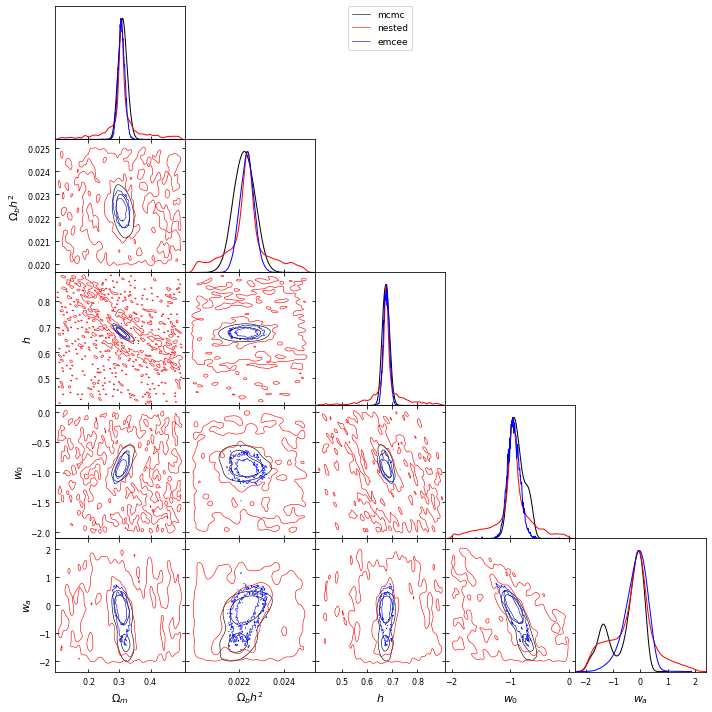

In [32]:
g = plots.get_subplot_plotter()
g.triangle_plot([samp1, samp2, samp3], filled=False, line_args={'lw':1},
#                 settings={ 'smooth_scale_2D':0.1, 'smooth_scale_1D':0.1},
                alphas=[1, 1, 1],  
                analysis_settings={'ignore_rows':0.1, 'contours':[0.2, 0.4, 0.6]
                ,  'smooth_scale_2D':0.9, 'smooth_scale_1D':0.9})

plt.savefig('wacdm_samplers_getdist3.png', dpi=300)